In [4]:
import os
import warnings
import tensorflow as tf
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from keras.callbacks import Callback, ModelCheckpoint
from matplotlib import pyplot
import sys
import tensorflow.keras as K

In [5]:
import tensorflow as tf
tf.__version__
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10868125902241690231,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 9988323456
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 11563577909884304717
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:65:00.0, compute capability: 6.1"]

In [2]:
import numpy as np
import time
import cv2
import torch
import math
import pandas as pd
import os
import time

"""
device = torch.device("cuda")
# import gensim
"""

'\ndevice = torch.device("cuda")\n# import gensim\n'

In [7]:
# GPU-initialization
session = None
if (session):
    session.close()
physical_devices = tf.config.list_physical_devices('GPU') 
print("Num GPUs:", len(physical_devices)) 

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

Num GPUs: 1


In [8]:
"""
def load_tensor(directions, dir_names, kors, directions_on = False):
    '''
    tensor 가져오는 방식을 csv에서 가져온 번호에서 부터 불러오도록 설정
    output 에 nums는 현재 가져온곳의 한글값을 표현하기 위해서 
    '''
    h_list = []
    answers = []
    
    for i, dir_name in enumerate(dir_names):
            
            path = 'output/tensor/'+dir_name
            if not (os.path.isdir(path)):
                continue
                
            if directions_on and not directions == '정면':
                continue
                
            h_list.append(torch.load(path+'/hand.pt'))
            print(dir_name, kors[i])
            answers.append(str(kors[i]))

    return h_list, answers
"""

"\ndef load_tensor(directions, dir_names, kors, directions_on = False):\n    '''\n    tensor 가져오는 방식을 csv에서 가져온 번호에서 부터 불러오도록 설정\n    output 에 nums는 현재 가져온곳의 한글값을 표현하기 위해서 \n    '''\n    h_list = []\n    answers = []\n    \n    for i, dir_name in enumerate(dir_names):\n            \n            path = 'output/tensor/'+dir_name\n            if not (os.path.isdir(path)):\n                continue\n                \n            if directions_on and not directions == '정면':\n                continue\n                \n            h_list.append(torch.load(path+'/hand.pt'))\n            print(dir_name, kors[i])\n            answers.append(str(kors[i]))\n\n    return h_list, answers\n"

In [9]:
"""
csv1 = pd.read_csv("output\csv\KETI-2017-SL-0_10480-v2_1.csv")
csv2 = pd.read_csv("output\csv\KETI-2018-SL-Annotation-v1.csv")

directions = pd.concat([csv1['방향'], csv2['방향']], ignore_index=True)
directions = directions[:43492]

dir_names = pd.concat([csv1['파일명'], csv2['파일명']], ignore_index=True)
dir_names = dir_names[:43492]

kors = pd.concat([csv1['한국어'], csv2['한국어']], ignore_index=True)
kors = kors[:43492]
"""

'\ncsv1 = pd.read_csv("output\\csv\\KETI-2017-SL-0_10480-v2_1.csv")\ncsv2 = pd.read_csv("output\\csv\\KETI-2018-SL-Annotation-v1.csv")\n\ndirections = pd.concat([csv1[\'방향\'], csv2[\'방향\']], ignore_index=True)\ndirections = directions[:43492]\n\ndir_names = pd.concat([csv1[\'파일명\'], csv2[\'파일명\']], ignore_index=True)\ndir_names = dir_names[:43492]\n\nkors = pd.concat([csv1[\'한국어\'], csv2[\'한국어\']], ignore_index=True)\nkors = kors[:43492]\n'

In [10]:
#print(directions)

In [11]:
def load_tensor(dir_path = [".", "output", "tensor"]):
    '''
    tensor 가져오는 방식을 csv에서 가져온 번호에서 부터 불러오도록 설정
    output 에 nums는 현재 가져온곳의 한글값을 표현하기 위해서 
    '''
    dir_path = os.path.join(*dir_path)
    tensor_folders = sorted(os.listdir(dir_path))
    print(tensor_folders[1:9])
    h_list = []
    answers = []
    
    # 0 ~ 7 순회
    for tensor_folder in tensor_folders[1:9]:
        tensors_path = os.path.join(dir_path + "/" + tensor_folder)
        tensors = sorted(os.listdir(tensors_path))
        
        # 각각의 숫자 순회
        for tensor in tensors:
            h_list.append(torch.load(tensors_path + "/" + tensor + "/hand.pt"))
            answers.append(tensor_folder)
            

    return h_list, answers

In [ ]:
import pandas as pd

def load_tensor_aihub(dir_path = [".", "output", "csv"]):
    '''
    tensor 가져오는 방식을 csv에서 가져온 번호에서 부터 불러오도록 설정
    output 에 nums는 현재 가져온곳의 한글값을 표현하기 위해서 
    '''
    
    dir_path = os.path.join(*dir_path)
    tensor_folders = sorted(os.listdir(dir_path))
    
    
    # 0 ~ 7 순회
    for tensor_folder in tensor_folders:
        if 'v2_1_num' in tensor_folder:
            num_csv = pd.read_csv(os.path.join(dir_path, tensor_folder))

            
    num_csv = num_csv[num_csv['한국어'] <= 7]  # 7 이하만 남김
    answers = []
    
    dir_path = os.path.join('.', 'dummy')
    tensor_folders = sorted(os.listdir(dir_path))
    
#     h_list = [''] * len(tensor_folders)
    h_list = []
    num_csv['파일명'] = num_csv['파일명'].map(lambda x : x.split('.')[0])

    print(num_csv[:10])
    
    print('fuck', num_csv.loc[102]['한국어'])
    
          
    for tensor_folder in tensor_folders:
        if 'KETI' in tensor_folder :
            idx = num_csv.index[tensor_folder == num_csv['파일명']].tolist()
            
            if len(idx) != 0:
                tensors_path = os.path.join(dir_path + "\\" + tensor_folder)
                tensors = sorted(os.listdir(tensors_path))        

                lh = torch.load(tensors_path + "\\" + "\\left_hand.pt")
                rh = torch.load(tensors_path + "\\" + "\\right_hand.pt")
#                 print(idx[0])
                h_list.append(torch.cat([lh, rh], dim=1))  
                answers.append(str(num_csv.loc[idx[0]]['한국어']))
    print(len(answers))
            

    return h_list, answers



In [8]:
load_tensor()

['0', '1', '2', '3', '4', '5', '6', '7']


In [12]:
h_list, answers = load_tensor()
answer_set = list(map(str, sorted(map(int, list(set(answers))))))

['0', '1', '2', '3', '4', '5', '6', '7']


In [13]:
for i in range(8):
    print("숫자", i, ":", answers.count(str(i)))

숫자 0 : 117
숫자 1 : 117
숫자 2 : 117
숫자 3 : 117
숫자 4 : 120
숫자 5 : 123
숫자 6 : 120
숫자 7 : 123


In [16]:
h_list[0].shape

torch.Size([41, 42, 3])

In [17]:
def matchFrame(lst, max_frame):
    for i in range(len(lst)):
        lst[i] = lst[i].view(lst[i].shape[0], -1)
        lst[i] = np.array(F.pad(lst[i], (0, 0, 0, max_frame - lst[i].shape[0]), value=0))
        
    return np.array(lst)

In [18]:
mx = 0
for i in h_list:
       mx = max(mx, i.shape[0])
print(mx)

71


In [19]:
hand_data = matchFrame(h_list, 71)

NameError: name 'F' is not defined

In [17]:
x_train, x_val, y_train, y_val = train_test_split(hand_data, answers, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.5, random_state=42)

In [18]:
print(answer_set)

['0', '1', '2', '3', '4', '5', '6', '7']


In [ ]:
hand_data.shape

In [19]:
encoder = LabelBinarizer()
test = encoder.fit_transform(answer_set)

y_train = encoder.transform(y_train)
y_val = encoder.transform(y_val)
y_test = encoder.transform(y_test)

In [20]:
print(y_train)

[[0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [22]:
# Model
dropout = 0.2
num_classes = len(answer_set)
nodesizes = [256, 256, 128]

inputs = keras.Input(shape=(x_train.shape[1], x_train.shape[2]))

lstm = Bidirectional(layers.LSTM(128, return_sequences=True))(inputs)
lstm = layers.Dropout(rate=dropout)(lstm)  

for i in range(0,3):    #number of layers random between 1 an 3
    lstm = Bidirectional(layers.LSTM(nodesizes[i],return_sequences=True))(lstm)
    lstm = layers.Dropout(rate=dropout)(lstm)

lstm = Bidirectional(layers.LSTM(256))(lstm)
lstm = layers.Dropout(rate=dropout)(lstm)
class_output = layers.Dense(num_classes, activation='softmax', name='class_output')(lstm)

model = keras.models.Model(inputs=inputs, outputs=[class_output])
# Plot the model graph
#keras.utils.plot_model(model, 'nn_graph.png', show_shapes=True)

model.compile(loss={
    'class_output': 'categorical_crossentropy', 
    },
    optimizer='Adamax',
    metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 71, 126)]         0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 71, 256)           261120    
_________________________________________________________________
dropout_5 (Dropout)          (None, 71, 256)           0         
_________________________________________________________________
bidirectional_6 (Bidirection (None, 71, 512)           1050624   
_________________________________________________________________
dropout_6 (Dropout)          (None, 71, 512)           0         
_________________________________________________________________
bidirectional_7 (Bidirection (None, 71, 512)           1574912   
_________________________________________________________________
dropout_7 (Dropout)          (None, 71, 512)           0   

In [23]:
# Train
checkpoint = ModelCheckpoint('model.h5', monitor='val_accuracy', verbose=1, mode = 'max', save_best_only=True, save_weights_only=False, period=1)

history = model.fit(
    x_train, y_train, 
    epochs=50, 
    batch_size=30, 
    validation_data=(x_val,y_val), 
    callbacks = [checkpoint],
    shuffle=False)

Epoch 1/50
20/20 [==============================] - 24s 308ms/step - loss: 2.0250 - accuracy: 0.1676 - precision_1: 0.1679 - recall_1: 0.0021 - val_loss: 1.8798 - val_accuracy: 0.1728 - val_precision_1: 0.5294 - val_recall_1: 0.0471
Epoch 2/50
20/20 [==============================] - 2s 86ms/step - loss: 1.5936 - accuracy: 0.3222 - precision_1: 0.5863 - recall_1: 0.0781 - val_loss: 1.5660 - val_accuracy: 0.3141 - val_precision_1: 0.7000 - val_recall_1: 0.1466
Epoch 3/50
20/20 [==============================] - 2s 87ms/step - loss: 1.3868 - accuracy: 0.3834 - precision_1: 0.6877 - recall_1: 0.2034 - val_loss: 1.0315 - val_accuracy: 0.5497 - val_precision_1: 0.7432 - val_recall_1: 0.2880
Epoch 4/50
20/20 [==============================] - 2s 92ms/step - loss: 0.9618 - accuracy: 0.5352 - precision_1: 0.6753 - recall_1: 0.3133 - val_loss: 0.9657 - val_accuracy: 0.5236 - val_precision_1: 0.5143 - val_recall_1: 0.2827
Epoch 5/50
20/20 [==============================] - 2s 86ms/step - loss: 0

---

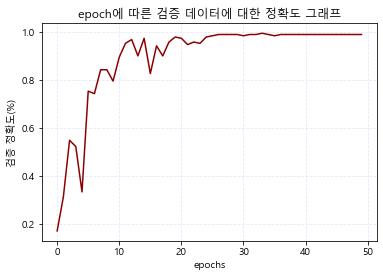

<Figure size 432x288 with 0 Axes>

In [31]:
# 도화지 생성
fig = plt.figure()
# 정확도 그래프 그리기
plt.plot(range(50), history.history['val_accuracy'], label='Accuracy', color='darkred')
# 축 이름
plt.xlabel('epochs')
plt.ylabel('검증 정확도(%)')
plt.title('epoch에 따른 검증 데이터에 대한 정확도 그래프')
plt.grid(linestyle='--', color='lavender')
# 그래프 표시
plt.show()
# 그래프 저장
plt.savefig('sign_launguage_acc.png')

---
### Predict

In [221]:
prec = []

pred_datas_path = os.path.join('.', 'output', 'tensor', 'num')
pred_datas = sorted(os.listdir(pred_datas_path))

for pred_data in pred_datas:
    pred_data_path = pred_datas_path + "\\" + pred_data
    for data in os.listdir(pred_data_path):
        prec.append(torch.load(pred_data_path + "\\" + data))

In [224]:
prec = matchFrame(prec, 71)

In [226]:
prec.shape

(8, 71, 126)

In [232]:
prec[0].shape

(71, 126)

In [243]:
for i, result in enumerate(model.predict(prec)):
    print(str(i+1) + "st data : ", np.argmax(result))

1st data :  1
2st data :  0
3st data :  2
4st data :  3
5st data :  4
6st data :  5
7st data :  7
8st data :  7
